In [1]:
import sklearn.datasets as datasets
import numpy as np
import re
import pandas as pd
import seaborn as sns
import os
from numpy import asarray
import matplotlib.pyplot as plt
from PIL import Image
import cv2

## Getting our dataset

In [2]:
# Path where our data is located
base_path = "./asl_dataset/"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [3]:
df.head()

,filename,category
0,n/hand1_n_left_seg_4_cropped.jpeg,23
1,1/hand3_1_dif_seg_4_cropped.jpeg,1
2,i/hand1_i_left_seg_4_cropped.jpeg,18
3,o/hand1_o_right_seg_1_cropped.jpeg,24
4,o/hand5_o_dif_seg_2_cropped.jpeg,24


In [4]:
pixel_arrays = []
for i,img in enumerate(df["filename"]):
    img = Image.open(base_path+img)  
    numpydata = asarray(img)
    pixel_arrays.append(numpydata)
df["pixel_data"] = pixel_arrays

In [5]:
df.head()

,filename,category,pixel_data
0,n/hand1_n_left_seg_4_cropped.jpeg,23,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,1/hand3_1_dif_seg_4_cropped.jpeg,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,i/hand1_i_left_seg_4_cropped.jpeg,18,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,o/hand1_o_right_seg_1_cropped.jpeg,24,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,o/hand5_o_dif_seg_2_cropped.jpeg,24,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [6]:
gray_scale = []
for data in df["pixel_data"]:
    gray_data = data.mean(axis=2)
    gray_scale.append(gray_data.astype(np.uint8))

df["pixel_data"] = gray_scale


In [7]:
df.head()

,filename,category,pixel_data
0,n/hand1_n_left_seg_4_cropped.jpeg,23,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1/hand3_1_dif_seg_4_cropped.jpeg,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,i/hand1_i_left_seg_4_cropped.jpeg,18,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,o/hand1_o_right_seg_1_cropped.jpeg,24,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,o/hand5_o_dif_seg_2_cropped.jpeg,24,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [8]:
freq = {}
for cat in df["category"].unique():
    for val in df["category"]:
        if val == cat:
            if cat not in freq:
                freq[cat] = 1
            else:
                freq[cat] += 1
freq.keys()
freq.values()

dict_values([70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 65, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70])

In [9]:
df["pixel_data"][0].shape

(400, 400)

## Extracting the keypoints

In [10]:
sift = cv2.SIFT_create()

keypoints = []
descriptors = []

In [11]:
for img in df["pixel_data"]:
    kp, des = sift.detectAndCompute(img, None)
    
    keypoints.append(kp)
    descriptors.append(des)

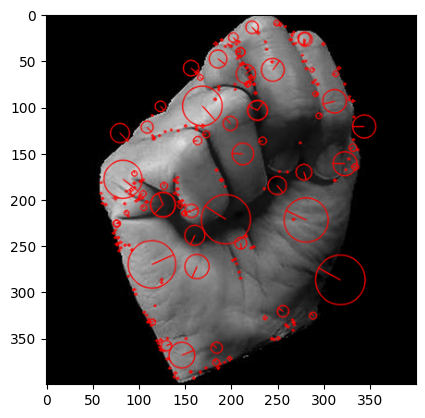

[[34.  1.  0. ...  5.  1.  1.]
 [18.  0.  0. ...  1.  1.  0.]
 [ 3.  1.  0. ...  1.  1.  3.]
 ...
 [29.  0.  0. ... 13.  0.  0.]
 [18.  1.  0. ...  2.  1.  1.]
 [ 1.  0.  0. ...  1. 37. 52.]]


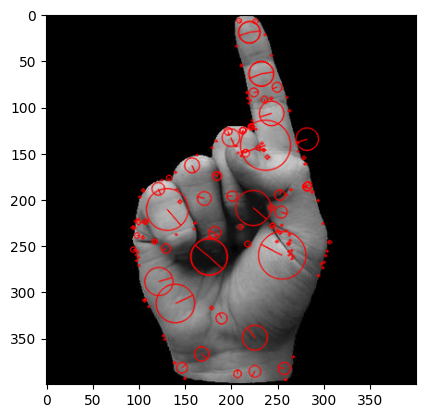

[[ 1.  0.  0. ... 26.  7.  3.]
 [ 1.  0.  0. ...  1.  4.  7.]
 [ 2.  0.  0. ... 59. 22. 13.]
 ...
 [ 4.  3.  0. ...  0.  3. 50.]
 [ 2.  1.  0. ...  0.  0.  5.]
 [ 0.  0.  0. ...  0.  0.  4.]]


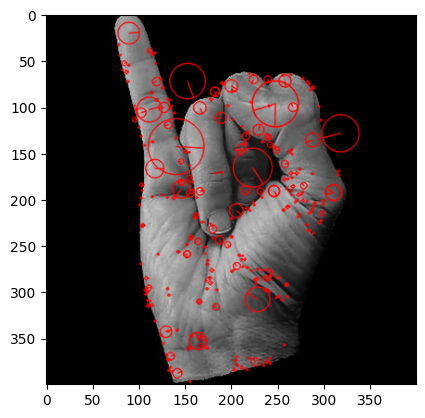

[[17.  1.  0. ...  1.  1. 10.]
 [71.  8.  0. ...  5.  3.  5.]
 [ 3.  0.  0. ...  4.  3.  4.]
 ...
 [36.  1.  0. ...  0.  0.  2.]
 [ 2.  0.  0. ...  0.  0.  9.]
 [ 0.  0.  0. ...  4.  1.  1.]]


In [12]:
output_image = []
for x in range(3):
    output_image.append(cv2.drawKeypoints(df["pixel_data"][x], keypoints[x], 0, (255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
    plt.imshow(output_image[x], cmap='gray')
    plt.show()
    print(descriptors[x])

## The Codebook

In [13]:
np.random.seed(0)

sample_idx = np.random.randint(0, len(df)+1, 1000).tolist()

descriptors_sample = []

for n in sample_idx: # We get the descriptors of 1000 random shapes to establish the codebook
    descriptors_sample.append(np.array(descriptors[n]))

In [14]:
all_descriptors = []

for img_descriptors in descriptors_sample:
    for descriptor in img_descriptors:
        all_descriptors.append(descriptor)

# We join all the descriptors 
all_descriptors = np.stack(all_descriptors)

In [15]:
all_descriptors.shape

(203543, 128)

## Kmeans

In [35]:
from sklearn.cluster import KMeans

k = 200
iters = 1

kmeans = KMeans(n_clusters=k, n_init=iters, max_iter=300, random_state=0) # K means para identificar dentro de los descriptores los k elementos característicos
kmeans.fit(all_descriptors)
codebook = kmeans.cluster_centers_
variance = kmeans.inertia_

## Frequency Vectors

In [17]:
from sklearn.metrics.pairwise import manhattan_distances

def vq(descriptors, codebook): # vector quantization
    distances = manhattan_distances(descriptors, codebook)
    closest_visual_words = np.argmin(distances, axis=1)
    return closest_visual_words, distances

visual_words = []
distances = []
for img_descriptors in descriptors:
    img_visual_words, img_distances = vq(img_descriptors, codebook)
    visual_words.append(img_visual_words)
    distances.append(img_distances)

In [18]:
codebook[10].shape  # (all have the same dimensionality)

(128,)

In [19]:
frequency_vectors = []

for img_visual_words in visual_words:
    img_frequency_vector = np.zeros(k)
    for word in img_visual_words:
        img_frequency_vector[word] += 1
    frequency_vectors.append(img_frequency_vector)
# stack together in numpy array
frequency_vectors = np.stack(frequency_vectors)

In [20]:
frequency_vectors.shape

(2515, 200)

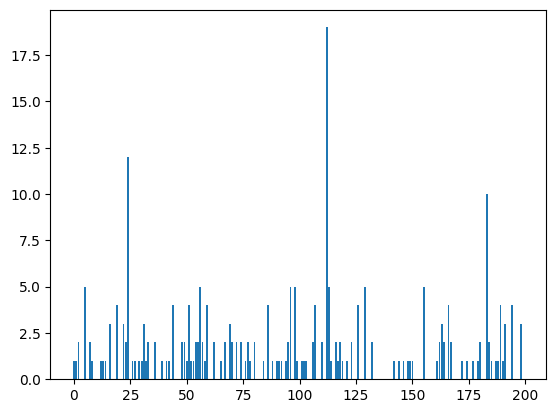

In [21]:
plt.bar(list(range(k)), frequency_vectors[0])
plt.show()

In [22]:
N = 2515

# df is the number of images that a visual word appears in
# we calculate it by counting non-zero values as 1 and summing
d_freq = np.sum(frequency_vectors > 0, axis=0)

In [23]:
idf = np.log(N/ d_freq)
idf.shape, idf[:5]

((200,), array([0.05601301, 0.67385145, 0.5652979 , 0.99591934, 1.32573991]))

In [24]:
tfidf = frequency_vectors * idf
tfidf.shape, tfidf[0][:5]

((2515, 200),
 array([0.05601301, 0.67385145, 1.13059581, 0.        , 0.        ]))

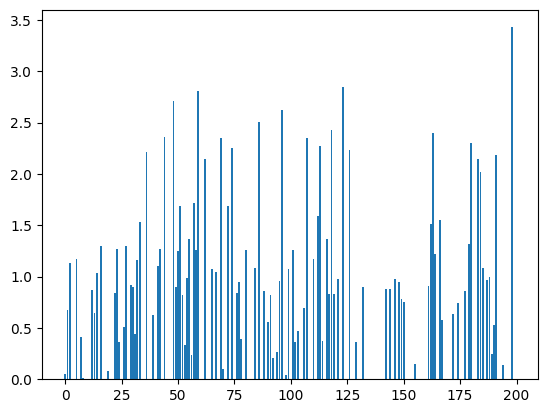

In [33]:
plt.bar(list(range(k)), tfidf[0])
plt.show()

1998: 10.1551


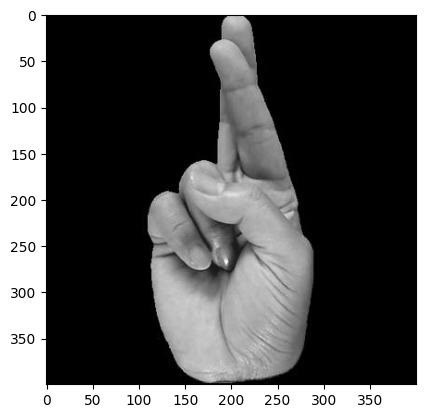

1395: 10.8494


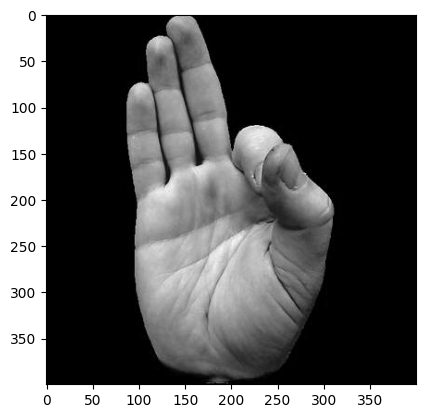

1086: 11.8166


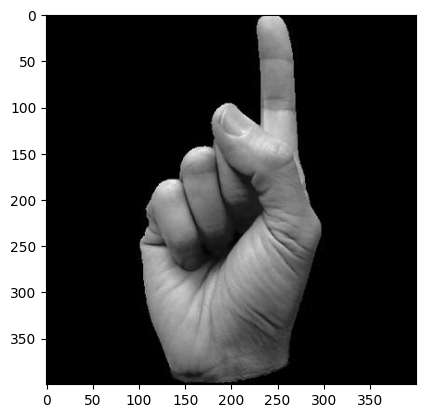

410: 13.2191


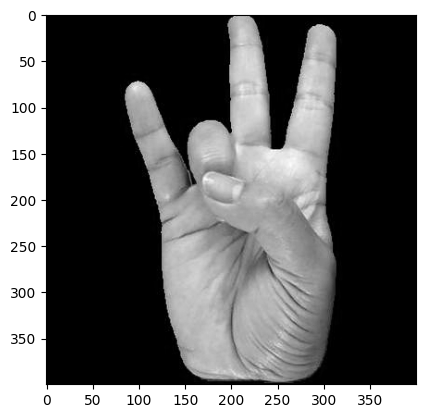

1231: 13.4792


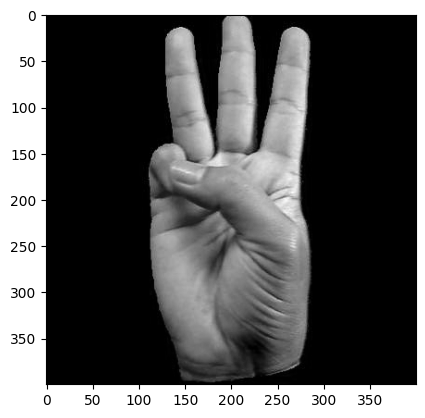

In [26]:
from numpy.linalg import norm

top_k = 5
i = 123

# get search image vector
a = tfidf[i]
b = tfidf[[k for k in range(2515) if k!=i]]  # set search space to the full sample
# get the cosine distance for the search image `a`
cosine_similarity = np.dot(a, b.T)/(norm(a) * norm(b, axis=1))
dot_similarity = np.dot(a, b.T)
# get the top k indices for most similar vecs
idx = np.argsort(dot_similarity)[:top_k]
# display the results
for i in idx:
    print(f"{i}: {round(dot_similarity[i], 4)}")
    plt.imshow(df["pixel_data"][i], cmap='gray')
    plt.show()

In [27]:
from collections import Counter

classification = []
for i in idx:
    classification.append(df["category"][i])

def majority_voting(predictions):
    counter = Counter(predictions)
    majority_vote = counter.most_common(1)[0][0]
    return majority_vote

categories[majority_voting(classification)]

'r'

In [28]:
# New non-dataset photo
# Needs tfidf 

def classify_image (new_img, similarity="dot"):
    # Preprocess: Image to grayscale non background of

    img = Image.open(new_img)  
    numpydata = asarray(img)

    if len(numpydata.shape) == 3:
        gray_data = numpydata.mean(axis=2)
        gray_array = gray_data.astype(np.uint8)
    else:
        gray_array = numpydata.astype(np.uint8)
    # 1. Takes image and extracts keypoints

    kp, des = sift.detectAndCompute(gray_array, None)
        

    # 2. Takes descriptors and finds the closest visual words in the codebook

    img_visual_words, img_distances = vq(des, codebook)


    # 3. Finds frequency vector

    img_frequency_vector = np.zeros(k)
    for word in img_visual_words:
        img_frequency_vector[word] += 1

    # Get tfidf from anterior

    tfidf_particular = img_frequency_vector * idf

    a = tfidf_particular
    '''
    try:
        b = tfidf.remove(a)
    except:
        b = tfidf
    '''
    b = tfidf[[i for i in range(2515) if list(tfidf[i]) != list(a)]]
    #print(b.shape)


    cosine_similarity = np.dot(a, b.T)/(norm(a) * norm(b, axis=1))
    dot_similarity = np.dot(a, b.T)
    # Cogemos los mas parecidos usando cosine similarity
    if similarity == "cosine":
        idx = np.argsort(cosine_similarity)[:top_k]
    else:
        idx = np.argsort(dot_similarity)[:top_k]        

    '''
    for i in idx:
        if similarity == "cosine":
            print(f"{i}: {round(cosine_similarity[i], 4)}")
        else:
            print(f"{i}: {round(dot_similarity[i], 4)}")
        plt.imshow(df["pixel_data"][i], cmap='gray')
        plt.show()
    '''
    classification = []
    for i in idx:
        classification.append(df["category"][i])

    #print("The sign corresponds to, en español, el signo corresponde a:",categories[majority_voting(classification)])
    return categories[majority_voting(classification)]



In [29]:
correct = 0
for i,path in enumerate(df["filename"]):
    res = classify_image(base_path+path, similarity="dot")
    if res == df["category"][i]:
        print("Correcto:",path,"es",res)
        correct += 1

print(f"Accuracy: {correct/len(df['filename'])}")

Accuracy: 0.0


## SVM

In [36]:
im_features = np.zeros((len(df["filename"]), k), dtype=np.float32)
for i in range(len(df["filename"])):
    for feature in descriptors[i]:
        feature = feature.reshape(1, -1)
        idx = kmeans.predict(feature)
        im_features[i][idx] += 1

In [42]:
df["category"]

0       23
1        1
2       18
3       24
4       24
        ..
2510    25
2511    21
2512    27
2513    22
2514    34
Name: category, Length: 2515, dtype: int64

In [43]:
#import standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#Normalizo los datos. TODO: Revisar si es necesario
scaler = StandardScaler().fit(im_features)
im_features = scaler.transform(im_features)


x_train, x_test, y_train, y_test = train_test_split(im_features, df["category"],train_size=0.6,shuffle=True)

svm = SVC(kernel='linear', C=1.0, gamma='scale')
svm.fit(x_train, y_train)


SVC(kernel='linear')

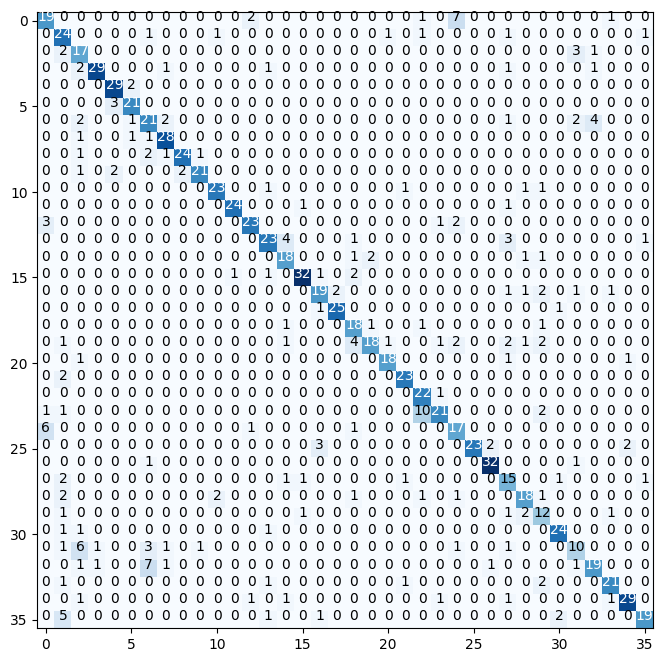

In [51]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > cm.max() / 2.0 else "black")
plt.show()
